In [1]:
import matplotlib.pyplot as plt
import numpy as np
# import discopy.util as util
# import discopy.plot as plot
# import discopy.geom as geom
from pathlib import Path

In [2]:
path = '/gpfs/hsu/BH_disco_runs/cb_circular_1000_orbits_v2/report.dat'
plot_dir = '/gpfs/hsu/Black_Hole_Accretion_Project_PI/Python_plots/cb_circular_1000_orbits_v2/'
dat = np.loadtxt(path)

In [3]:
dat[:,0]

array([0.00000000e+00, 6.51098102e-02, 1.26964130e-01, ...,
       1.15136249e+04, 1.15136868e+04, 1.15137486e+04])

In [4]:
t = dat[:,0]
mass = dat[:,1]
energy = dat[:,2]
radial_momentum = dat[:,3]
angular_momentum = dat[:,4]
vertical_momentum = dat[:,5]
passive_scalar = dat[:,6]
M1 = dat[:,7]
M2 = dat[:,8]
r1 = dat[:,9]
r2 = dat[:,10]
phi1 = dat[:,11]
phi2 = dat[:,12]
dM1 = dat[:,13]
dM2 = dat[:,14]
dJz_grv1 = dat[:,15]
dJz_grv2 = dat[:,16]
dJz_snk1 = dat[:,17]
dJz_snk2 = dat[:,18]
dPx_grv1 = dat[:,19]
dPx_grv2 = dat[:,20]
dPy_grv1 = dat[:,21]
dPy_grv2 = dat[:,22]
dPx_snk1 = dat[:,23]
dPx_snk2 = dat[:,24]
dPy_snk1 = dat[:,25]
dPy_snk2 = dat[:,26]
dK_grv1 = dat[:,27]
dK_grv2 = dat[:,28]
dK_snk1 = dat[:,29]
dK_snk2 = dat[:,30]
dMx_snk1 = dat[:,31]
dMx_snk2 = dat[:,32]
dMy_snk1 = dat[:,33]
dMy_snk2 = dat[:,34]
dSz_snk1 = dat[:,35]
dSz_snk2 = dat[:,36]
dU_grv1 = dat[:,37]
dU_grv2 = dat[:,38]
dU_snk1 = dat[:,39]
dU_snk2 = dat[:,40]

In [7]:
t[-1], t[-1000]


(11513.74863276254, 11450.98277572727)

In [8]:
G = 1
dE1 = dU_grv1 + dK_grv1 + dU_snk1 + dK_snk1
dE2 = dU_grv2 + dK_grv2 + dU_snk2 + dK_snk2
dE = dE1 + dE2
Edot = dE / (t[1] - t[0])

dJ1 = dJz_grv1 + dJz_snk1
dJ2 = dJz_grv2 + dJz_snk2
dJ = dJ1 + dJ2
Jdot = dJ / (t[1] - t[0])

M1dot = dM1 / (t[1] - t[0])
M2dot = dM2 / (t[1] - t[0])

phi1dot = (phi1[1] - phi1[0]) / (t[1] - t[0])
phi2dot = (phi2[1] - phi2[0]) / (t[1] - t[0])
J1 = M1 * r1**2 * phi1dot
J2 = M2 * r2**2 * phi2dot
J = J1 + J2
v1_sqared = r1**2 * phi1dot**2
v2_sqared = r2**2 * phi2dot**2
E1 = 0.5 * M1 * v1_sqared - G * M1 * M2 / r1
E2 = 0.5 * M2 * v2_sqared - G * M1 * M2 / r2
E = E1 + E2



# Compute a dot
adot = -G/2 * ((M1dot * M2 + M1 * M2dot) / E - M1 * M2 * Edot / E**2)
edot = (M1 * M2)**(-3/2) * J * (-2 * E * (M1+ M2) )**(-1/2) * (Edot * (M1+M2) + E 
* (M1dot + M2dot)) + (-2 * E * (M1 + M2))**(1/2) * (J * 3/2 * (M1 * M2)**(-5/2) * (M1dot * M2 + M1 * M2dot) +
    Jdot * (M1 * M2)**(-3/2))

In [9]:
# Smooth and Average out data

def moving_avg(data):
    avg_data = []
    for i in range(len(data)):
        avg_data.append(np.mean(data[0:i]))
    return avg_data

In [10]:
# Check reuslt for a dot and e dot using edot = 0
Edot_test = (M1 * M2)**(-3/2) * J * (-2 * E * (M1+ M2) )**(-1/2) * Edot * (M1+M2) + (-2 * E * (M1 + M2))**(1/2) * (J * 3/2 * (M1 * M2)**(-5/2) * (M1dot * M2 + M1 * M2dot) +
             Jdot * (M1 * M2)**(-3/2))
adot_test = -G/2 * ((M1dot * M2 + M1 * M2dot) / E - M1 * M2 * Edot_test / E**2)

# Check using e = 0
E_test2 = G**2 * M1**3 * M2**3 / (-2 * J**2 * (M1 + M2))
adot_test2 = -G/2 * ((M1dot * M2 + M1 * M2dot) / E_test2 - M1 * M2 * Edot / E_test2**2)

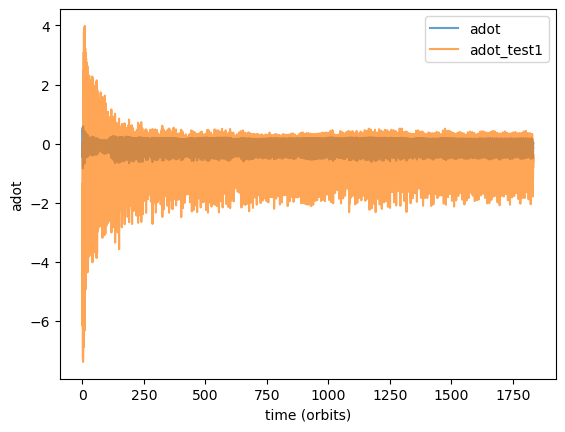

In [11]:
fig, ax = plt.subplots(1, 1)
# ax.plot(t / ( 2 * np.pi), radial_momentum_avg)
ax.plot(t / ( 2 * np.pi), adot, label='adot', alpha=0.7) 
ax.plot(t / ( 2 * np.pi), adot_test, label='adot_test1', alpha=0.7)
ax.set_ylabel('adot')
ax.set_xlabel('time (orbits)')
# fig.savefig(plot_dir + 'dJz_snk_avg')
plt.legend()
plt.show()
plt.close(fig) #delete figure from memory

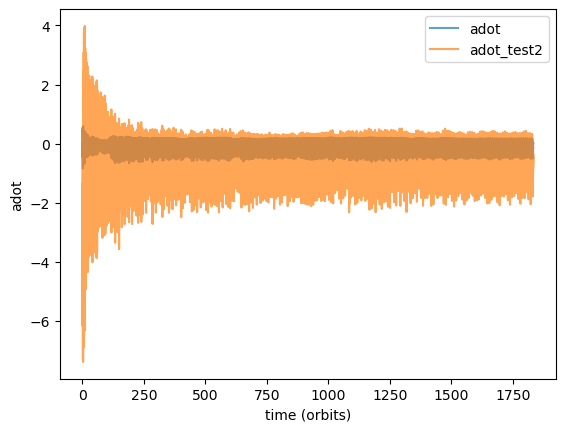

In [12]:
fig, ax = plt.subplots(1, 1)
# ax.plot(t / ( 2 * np.pi), radial_momentum_avg)
ax.plot(t / ( 2 * np.pi), adot, label='adot', alpha=0.7) 
ax.plot(t / ( 2 * np.pi), adot_test, label='adot_test2', alpha=0.7)
ax.set_ylabel('adot')
ax.set_xlabel('time (orbits)')
# fig.savefig(plot_dir + 'dJz_snk_avg')
plt.legend()
plt.show()
plt.close(fig) #delete figure from memory

In [13]:

adot_avg = moving_avg(adot)
edot_avg = moving_avg(edot)
radial_momentum_avg = moving_avg(radial_momentum)
angular_momentum_avg = moving_avg(angular_momentum)
dM1_avg = moving_avg(dM1)
dM2_avg = moving_avg(dM2)
dJz_grv1_avg = moving_avg(dJz_grv1)
dJz_grv2_avg = moving_avg(dJz_grv2)
dJz_snk1_avg = moving_avg(dJz_snk1)
dJz_snk2_avg = moving_avg(dJz_snk2)




/home/hsu/miniconda3/envs/work/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hsu/miniconda3/envs/work/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [49]:
# fig, ax = plt.subplots(1, 1)
# # ax.plot(t / ( 2 * np.pi), passive_scalar)
# ax.plot(t / ( 2 * np.pi), dJz_grv1/(t[1] - t[0]), label='dJz_grv1/dt') 
# ax.plot(t / ( 2 * np.pi), dJz_grv2/(t[1] - t[0]), label='dJz_grv2/dt')
# # ax.plot(t / ( 2 * np.pi), phi1, label='phi1') 
# # ax.plot(t / ( 2 * np.pi), phi2, label='phi2')
# # ax.set_ylim(0, 0.5)
# ax.set_ylabel('dJz_grv/dt')
# ax.set_xlabel('time (orbits)')
# fig.savefig(plot_dir + 'dJz_grv')
# plt.legend()
# plt.show()
# plt.close(fig) #delete figure from memory

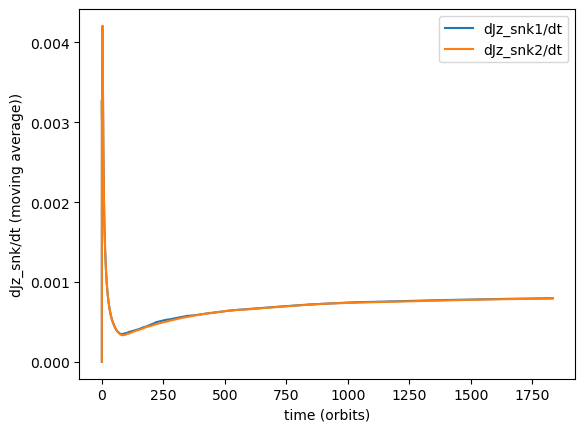

In [16]:
fig, ax = plt.subplots(1, 1)
# ax.plot(t / ( 2 * np.pi), radial_momentum_avg)
ax.plot(t / ( 2 * np.pi), dJz_snk1_avg/(t[1] - t[0]), label='dJz_snk1/dt') 
ax.plot(t / ( 2 * np.pi), dJz_snk2_avg/(t[1] - t[0]), label='dJz_snk2/dt')
ax.set_ylabel('dJz_snk/dt (moving average))')
ax.set_xlabel('time (orbits)')
fig.savefig(plot_dir + 'dJz_snk_avg')
plt.legend()
plt.show()
plt.close(fig) #delete figure from memory